#### Import the neccessary libraries

For this exercise we are mainly going to need pandas and numpy libraries in Python 3.
So let's import them.

In [14]:
#3.4 ALL
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Import dataset

In [15]:
df = pd.read_csv("clinic_performance.csv")

#### Data cleaning

Now, let's check whether data is clean and doesn't contain any missing values or null values. We use "isnull" function which returns true if there some null values and false if there arent any. 

In [16]:
df.isnull().values.any()

False

In our case, there are no missing data. However, if it would be the case, we would need to go deeper into the data cleaning process.

#### Dataset summary

Receive a summary of the columns in the dataset.

In [17]:
df.columns

Index(['EmpNumber', 'Age', 'Gender', 'MaritalStatus', 'EmpJobRole',
       'DistanceFromHomeKm', 'EmpEnvironmentSatisfaction', 'EmpHourlyRate',
       'EmpJobInvolvement', 'EmpJobSatisfaction', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'EmpWorkLifeBalance',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion', 'Attrition',
       'PerformanceRating'],
      dtype='object')

Let's take a look at the first rows of the dataset to get some understanding of how it looks like.

In [18]:
df.head()

,EmpNumber,Age,Gender,MaritalStatus,EmpJobRole,DistanceFromHomeKm,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobSatisfaction,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,EmpWorkLifeBalance,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,Attrition,PerformanceRating
0,E1001000,32,Male,Single,Critical care nurse,10,4,55,3,4,No,12,4,10,2,7,0,No,3
1,E1001006,47,Male,Single,Critical care nurse,14,4,42,3,1,No,12,4,20,3,7,1,No,3
2,E1001007,40,Male,Married,Critical care nurse,5,4,48,2,1,Yes,21,3,20,3,13,1,No,4
3,E1001009,41,Male,Divorced,Gerontological nurse,10,2,73,2,4,No,15,2,23,2,6,12,No,3
4,E1001010,60,Male,Single,Critical care nurse,16,1,84,3,1,No,14,4,10,3,2,2,No,3


"describe" function helps us to receive a statistical summary of the dataset.

In [19]:
df.describe()

,Age,DistanceFromHomeKm,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobSatisfaction,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,EmpWorkLifeBalance,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,PerformanceRating
count,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000
mean,37.602848,9.594937,2.748418,66.079114,2.723101,2.737342,15.072785,2.655063,12.193038,2.764241,4.762658,2.520570,2.882911
std,8.916705,8.368334,1.095299,20.314954,0.710508,1.097756,3.560358,1.092260,7.616444,0.711989,3.552281,3.481837,0.553530
min,18.000000,1.000000,1.000000,30.000000,1.000000,1.000000,11.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000
25%,31.000000,2.000000,2.000000,48.000000,2.000000,2.000000,12.000000,2.000000,7.000000,2.000000,2.000000,0.000000,3.000000
50%,36.000000,7.000000,3.000000,67.000000,3.000000,3.000000,14.000000,3.000000,10.000000,3.000000,4.000000,1.000000,3.000000
75%,44.000000,15.000000,4.000000,83.250000,3.000000,4.000000,17.000000,4.000000,15.000000,3.000000,7.000000,4.000000,3.000000
max,60.000000,29.000000,4.000000,100.000000,4.000000,4.000000,25.000000,4.000000,38.000000,4.000000,17.000000,15.000000,4.000000


Graphical respresentation of the distribution of the data can also be helpful at this point. To give a few examples, we are going to plot the distribution of workload as well as performance with the help of seaborn library. Wee see that the majority of employees have the performance 5. 


Employee Job Role Performance Analysis:
 EmpJobRole
Gerontological nurse         3.000000
Medical surgical nurse       3.000000
Nurse Anesthetist            3.000000
Occupational Health nurse    2.936170
Health Informatics           2.859375
Critical care nurse          2.855556
Healthcare Representative    2.848485
Practitioner nurse           2.833333
Family nurse                 2.775510
Name: PerformanceRating, dtype: float64


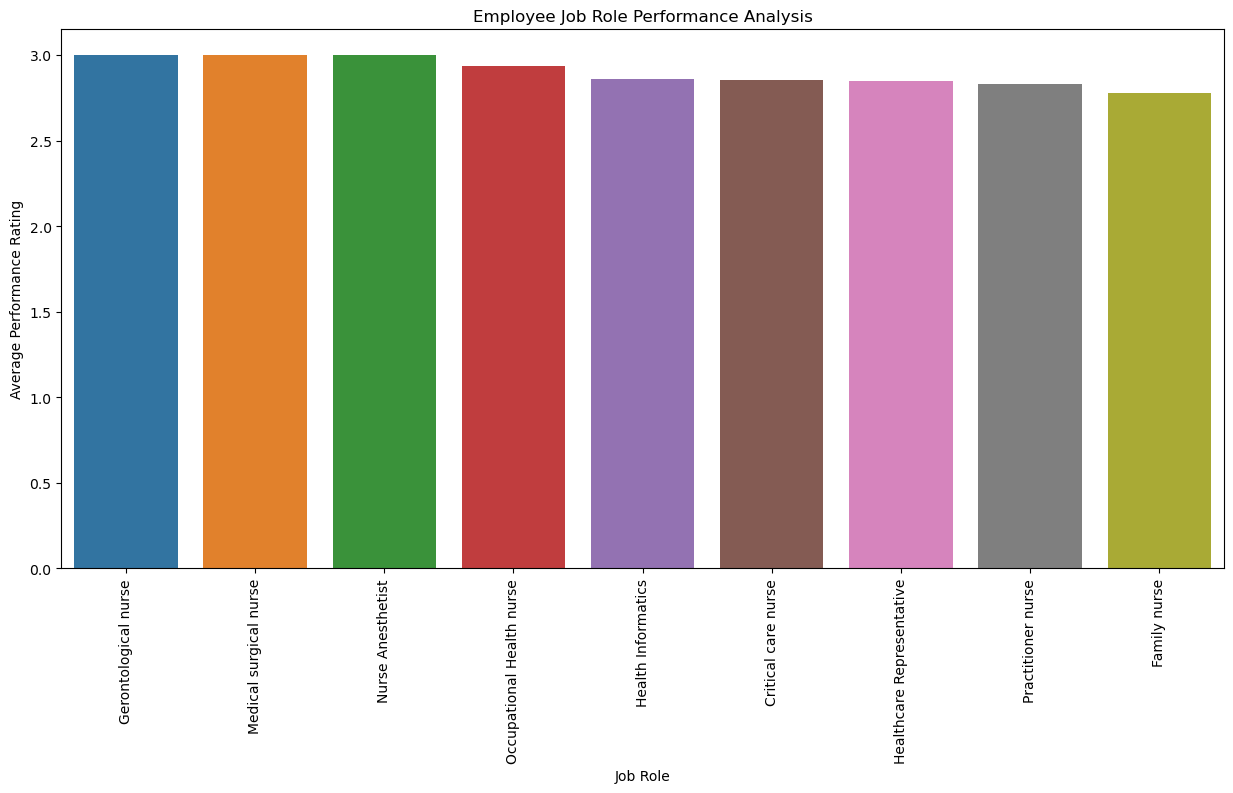

In [20]:
#1st answer
# Employee job role performance analysis
performance_by_role = df.groupby('EmpJobRole')['PerformanceRating'].mean().sort_values(ascending=False)
print("\nEmployee Job Role Performance Analysis:\n", performance_by_role)
# Plotting Employee Job Role Performance Analysis
plt.figure(figsize=(15, 7))
sns.barplot(x=performance_by_role.index, y=performance_by_role.values)
plt.title('Employee Job Role Performance Analysis')
plt.xlabel('Job Role')
plt.ylabel('Average Performance Rating')
plt.xticks(rotation=90)
plt.show()


We can observe a normal distribution here.

In [21]:
#2nd answer
import pandas as pd


# Convert categorical data to numerical format using one-hot encoding
data = pd.get_dummies(df, drop_first=True)

# Separate features (X) and target (y)
X = data.drop(columns=['PerformanceRating'])
y = data['PerformanceRating']

# Calculate Pearson correlation coefficients between each feature and the target variable
correlation_scores = X.apply(lambda feature: feature.corr(y))

# Create a DataFrame to store feature names and their correlation scores
feature_corr_df = pd.DataFrame({'Feature': correlation_scores.index, 'Correlation_Score': correlation_scores.values})

# Sort the DataFrame based on the absolute correlation scores in descending order
feature_corr_df['Abs_Correlation_Score'] = feature_corr_df['Correlation_Score'].abs()
feature_corr_df = feature_corr_df.sort_values(by='Abs_Correlation_Score', ascending=False)

# Print the most important features based on correlation scores
print("Most important features affecting performance:")
print(feature_corr_df.head(4))  # Change the number here to get more top features if needed


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [24]:
#3rd answer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, r2_score
import statsmodels.api as sm

df = pd.read_csv("clinic_performance.csv")

# Extract the target variable (PerformanceRating) and features (excluding EmpNumber and PerformanceRating)
X = df.drop(columns=["EmpNumber", "PerformanceRating"])
y = df["PerformanceRating"]

# Perform label encoding for categorical features
categorical_features = ["Gender", "MaritalStatus", "EmpJobRole", "OverTime", "Attrition"]
for feature in categorical_features:
    le = LabelEncoder()
    X[feature] = le.fit_transform(X[feature])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Gradient Boosting Machine model
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gbm_model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

# Print feature importances
feature_importances = gbm_model.feature_importances_
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance}")

# Test prediction on a single data point
predicted_value = gbm_model.predict([[7, 4, 7, 6, 5, 5, 1, 7, 2, 10, 11, 12, 13, 14, 15, 16, 17]])
actual_value = df.loc[0, 'PerformanceRating']

print("Predicted Value:", predicted_value[0])
print("Actual Value:", actual_value)

# Calculate R-squared score
r2_score_value = r2_score(y_test, y_pred)
print("R-squared Score:", r2_score_value)




Model Accuracy: 0.9291338582677166
Age: 0.010493787473941061
Gender: 5.293589406713921e-05
MaritalStatus: 0.002233766252370911
EmpJobRole: 0.02340682009092902
DistanceFromHomeKm: 0.024698041833472007
EmpEnvironmentSatisfaction: 0.30190634264686955
EmpHourlyRate: 0.01434797313859676
EmpJobInvolvement: 0.0007743521772687931
EmpJobSatisfaction: 0.0030316923531685694
OverTime: 0.0019290726306171251
EmpLastSalaryHikePercent: 0.21732538224767556
EmpRelationshipSatisfaction: 0.0048237384291938
TotalWorkExperienceInYears: 0.013706935071552793
EmpWorkLifeBalance: 0.06919866370406777
ExperienceYearsInCurrentRole: 0.07866647582330573
YearsSinceLastPromotion: 0.23088184373644252
Attrition: 0.0025221764964609137
Predicted Value: 3
Actual Value: 3
R-squared Score: 0.7062451811873554


/Users/rehnuma/opt/miniconda3/envs/pa/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# Create a DataFrame to compare actual and predicted values
pred_y_df = pd.DataFrame({'Actual Value': y_test, 'Predicted value': y_pred, 'Difference': y_test - y_pred})
print(pred_y_df.head(20))

# Convert X and y to numpy arrays for the OLS model
x = X.values
y = y.values


     Actual Value  Predicted value  Difference
328             3                3           0
247             3                3           0
570             3                3           0
145             2                2           0
496             3                3           0
405             3                3           0
165             3                3           0
77              3                3           0
533             3                3           0
163             3                3           0
271             3                3           0
31              3                3           0
55              2                2           0
90              3                3           0
575             3                3           0
76              3                3           0
2               4                4           0
256             2                3          -1
311             4                4           0
333             4                4           0


In [ ]:
# Fit the OLS model
model = sm.OLS(y, x).fit()

# Print the model summary
print(model.summary2())

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                       Results: Ordinary least squares
Model:                  OLS              Adj. R-squared (uncentered): 0.976   
Dependent Variable:     y                AIC:                         820.2282
Date:                   2023-07-30 12:53 BIC:                         895.8593
No. Observations:       632              Log-Likelihood:              -393.11 
Df Model:               17               F-statistic:                 1498.   
Df Residuals:           615              Prob (F-statistic):          0.00    
R-squared (uncentered): 0.976            Scale:                       0.20876 
-----------------------------------------------------------------------------------
            Coef.       Std.Err.         t         P>|t|  